In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd
import re

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})
sns.set_context("paper")

In [2]:
df = pd.read_csv("data/dataset_level.csv", index_col=0)

# Dataset size

(0, 80)

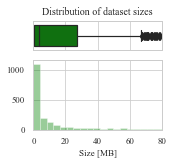

In [3]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, \
    gridspec_kw={"height_ratios": (.3, .7)}, \
    figsize=(2.3, 2))

# Add a graph in each part
sns.boxplot(df["sizeMB"], ax=ax_box, color="g", width=0.7,)
ax_box.set_yticks([])

sns.distplot(df["sizeMB"], ax=ax_hist, bins=800, kde=False, color="g")
#sns.set_context("paper")

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('Distribution of dataset sizes',fontsize=10)
ax_hist.set_xlabel("Size [MB]",fontsize=9)

#plt.ylim(0, 1000)
plt.xlim(0, 80)

#f.tight_layout()
#f.savefig("plots/ds_size.pdf", dpi=100, bbox_inches = "tight")

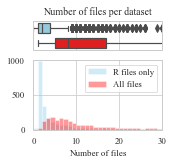

In [4]:
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, 
    gridspec_kw={"height_ratios": (.30,.70)}, 
    figsize=(2.3, 2))

sns.boxplot(
    data=df[["r_file","files_count"]], 
    width=0.7, 
    palette= dict(r_file="skyblue", files_count="red"),
    ax = ax_box,
    orient='h',
)
ax_box.set_yticks([])

b = range(df["r_file"].max())
sns.distplot( df["r_file"] , color="skyblue", kde=False, bins=b, label="R files only", ax=ax_hist)
sns.distplot( df["files_count"] , bins=b, color="red", kde=False, label="All files", ax=ax_hist)

ax_box.set(xlabel='')
#ax_box2.set(xlabel='')
ax_box.set_title('Number of files per dataset',fontsize=10)
ax_hist.set_xlabel("Number of files",fontsize=9)

plt.xlim(0, 30)
plt.ylim(0, 1000)
plt.legend()

#f.savefig("plots/files_per_ds.pdf", dpi=100, bbox_inches = "tight")

(0, 60)

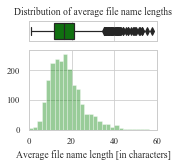

In [5]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(2.3, 2))

# Add a graph in each part
b = range(0,int(df["avg_file_len"].max()),2)
sns.boxplot(df["avg_file_len"], ax=ax_box, color="g")
sns.distplot(df["avg_file_len"], ax=ax_hist, color="g", bins=b, kde=False)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('Distribution of average file name lengths')
ax_hist.set_xlabel("Average file name length [in characters]")

plt.xlim(0, 60)
#f.tight_layout()
#f.savefig("plots/file_len.pdf", dpi=100, bbox_inches = "tight")

In [6]:
libs = df['list_of_libs']

In [7]:
libs_list = []
for l in libs:
    libs_list.extend(str(l).split(';'))

In [8]:
while("" in libs_list) : 
    libs_list.remove("") 

import collections

x=collections.Counter(libs_list)
x = x.most_common()[:50]

t = map(list, zip(*x))
names = t[0]
counts = t[1]

Text(0.5,1,'50 most freqently used R libraries')

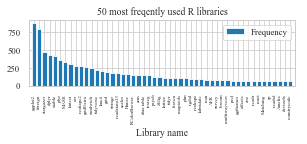

In [9]:
plt.figure(figsize=(4.78,1.2))
r = range(0, len(counts))
plt.bar(r, counts, label="Frequency")
plt.xlim(-1, len(counts))
plt.xticks(r, names, rotation=90, fontsize=5)
plt.yticks(np.arange(0, max(counts)+1, 250.0))

plt.xlabel("Library name") #, size=15)

plt.legend(loc='upper right',  ncol=1) #,prop={'size': 15})

plt.title("50 most freqently used R libraries") #, size=20)

#plt.savefig("plots/lib_frequency.pdf", bbox_inches = "tight")
#plt.show()

# Documentation

In [10]:
from helpers import make_autopct

In [11]:
# Pie chart
labels = ['Yes',  'No']
sizes = [(df['docs'] == 1).sum(), (df['docs'] == 0).sum()]

Text(0.5,1,'Dataset contains documentation\n (readme, code book or instructions)?')

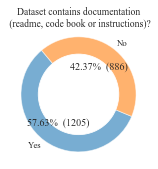

In [12]:
plt.figure(figsize=(2.3, 2.3))
plt.rcParams['font.size'] = 10
plt.pie(
    sizes, labels=labels, 
    autopct=make_autopct(sizes), 
    startangle=130,  
    wedgeprops={'alpha':0.6})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title("Dataset contains documentation\n (readme, code book or instructions)?") #, size=18)

#plt.savefig("plots/docs.pdf", bbox_inches = "tight")

(0, 50)

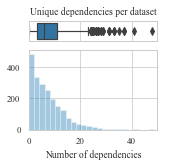

In [13]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(2.3, 2))

# Add a graph in each part
sns.boxplot(df["unique_libs_no"], ax=ax_box)
sns.distplot(df["unique_libs_no"], ax=ax_hist, bins=90, kde=False)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('Unique dependencies per dataset') #, fontsize=18)
ax_hist.set_xlabel("Number of dependencies")
#, fontsize=12)
#plt.xscale('log')
plt.xlim(0, 50)
#plt.show()

#f.tight_layout()
#f.savefig("plots/unique_deps.png", dpi=100)
#plt.savefig("plots/unique_deps.pdf", dpi=100,  bbox_inches = "tight")

In [15]:
df = pd.read_csv("data/rfile_stats.csv", delimiter='\t', \
                 names=['doi', 'filename', 'comments_no', 'dep_no', 'func_no', \
                        'test_no', 'class_no','encoding', 'total_lines'])

In [16]:
def column_to_int(el):
    el = el.strip()
    
    if el.isdigit():
        return float(el.split()[0])
    else:
        print(el)  
        return np.nan

In [17]:
df['total_lines']=df["total_lines"].apply(column_to_int)
df['comments_no']=df["comments_no"].apply(column_to_int)

simple slopes
13 state south.R
OA3
2 and 3.R
and main effects.R
OA4
4 (Point Estimates).R


(0, 1000)

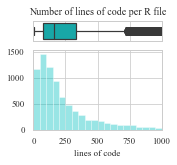

In [18]:
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(2.3, 2))

# Add a graph in each part
sns.boxplot(df["total_lines"], color='c', ax=ax_box)
b = range(0,int(df["total_lines"].max()),50)
sns.distplot(df["total_lines"].dropna(), color='c', ax=ax_hist, kde=False, bins=b)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('Number of lines of code per R file',fontsize=10)
ax_hist.set_xlabel("lines of code",fontsize=9)

#plt.xscale('log')
plt.xlim(0, 1000)

#plt.savefig("plots/lines_of_code.pdf", dpi=100,  bbox_inches = "tight")

In [19]:
# ( total lines - no of comments ) / no of comments
df['comm_rel']=(df['total_lines']-df['comments_no'])/df['comments_no']
df['comm_rel']=df['comm_rel'].round(2)
df=df.replace([np.inf, -np.inf], np.nan)

(0, 30)

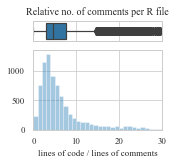

In [20]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, 
    gridspec_kw={"height_ratios": (.2, .8)}, 
    figsize=(2.3, 2))
# Add a graph in each part
sns.boxplot(df["comm_rel"], ax=ax_box)
b = range(0,int(df["comm_rel"].max()),1)
sns.distplot(df["comm_rel"].dropna(), ax=ax_hist, kde=False, bins=b)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set_title('Relative no. of comments per R file',fontsize=10)
ax_hist.set_xlabel("lines of code / lines of comments",fontsize=9)
#plt.xscale('log')
plt.xlim(0, 30)
#plt.show()

#f.tight_layout()
#f.savefig("plots/rel_comments.png", dpi=100)
#plt.savefig("plots/rel_comments.pdf", dpi=100,  bbox_inches = "tight")